### Objectives: 
- run LR, RF, XGB, AdaBoost
- currently XGB perform best with highest AUC
- testing accuracy of XGB is highest comparing to other classifiers

- AdaBoost with base learner is LR, has lowest AUC
- all of these classifiers are "bias" toward negative class, with TN > TP, even though this dataset has balance class. --> why? maybe because the variables Xs more prone to negative class? or any "imbalance" in spliting training, testing sets? 

In [8]:
from ML_train_models import *
from matplotlib import pyplot

In [2]:
path = '/Users/thanhng/is-Thanh/data/osteo_clean.csv'
data = pd.read_csv(path)

'''filter data '''
cols_interested= ['Strata','sex','race_combine', 'Age_combine','osteo_predict', 'BMI_Avg_imputed',
                'Alcohol_Prior', 'Tobacco_Prior','Drug_antipsych_prior', 'Drug_Estrogens_prior',
                'Drug_Glucocorticoids_prior','Drug_Nsaids_prior', 'Drug_Opiates_prior',
                'Drug_Thiazide_prior','Drug_Loop_Diuretic_Prior','Drug_Pp_inhibitors_prior',
                'Drug_Progesterone_prior','Drug_Seizure_prior','Drug_Ssris_prior',
                'Drug_Tc_antidepress_prior','HeartDisease_Prior','Liver_Prior','PulmDisease_Prior',
                'CNS_Disease_Prior','Malignancy_Prior','Hyponatremia_Prior','Chronic_Hyponatremia','Recent_Hyponatremia',
                'Median_Recent_Hypo_Cat_edit', 'Lowest_Recent_Hypo_Cat_edit',
                'Calcium_Closest_Osteo_decile','Calcium_Avg_Prior_decile','Calcium_Avg_Ever_decile',
                'Sodium_Closest_Osteo_decile','Sodium_Avg_Prior_decile','Sodium_Avg_Ever_decile',
                'Sodium_Worst_Prior_decile','Sodium_Worst_Ever_decile',
                'Calcium_Closest_Osteo_cat', 'Calcium_Avg_Prior_cat','Calcium_Avg_Ever_cat',
                'Sodium_Closest_Osteo_cat','Sodium_Avg_Prior_cat','Sodium_Avg_Ever_cat',
                'Sodium_Worst_Prior_cat','Sodium_Worst_Ever_cat']

data_filter = data.filter(cols_interested)

'''convert int64 to object dtypes to prepare for OHE '''
#check dtypes first
data_prepare = CONVERT_STRING_FLOAT(data_filter)

#OHE (from 46 to 139 cols)
data_OHE = OHE(data_prepare)


shape before OHE:  (61022, 46)
OHE shape:  (61022, 139) 

Cols: Index(['Strata', 'Alcohol_Prior', 'Tobacco_Prior', 'Drug_antipsych_prior',
       'Drug_Estrogens_prior', 'Drug_Glucocorticoids_prior',
       'Drug_Nsaids_prior', 'Drug_Opiates_prior', 'Drug_Thiazide_prior',
       'Drug_Loop_Diuretic_Prior',
       ...
       'Sodium_Worst_Ever_decile_1.0', 'Sodium_Worst_Ever_decile_2.0',
       'Sodium_Worst_Ever_decile_3.0', 'Sodium_Worst_Ever_decile_4.0',
       'Sodium_Worst_Ever_decile_5.0', 'Sodium_Worst_Ever_decile_6.0',
       'Sodium_Worst_Ever_decile_7.0', 'Sodium_Worst_Ever_decile_8.0',
       'Sodium_Worst_Ever_decile_9.0', 'Sodium_Worst_Ever_decile_nan'],
      dtype='object', length=139)


In [3]:
#run multiple models
classifiers = ['LR', 'RF', 'XGB', 'AdaBoost']
result_df = RUN_MULTIPLE_MODELS(data_prepare, classifiers, 'false')

OHE shape:  (61022, 139) 

Cols: Index(['Strata', 'Alcohol_Prior', 'Tobacco_Prior', 'Drug_antipsych_prior',
       'Drug_Estrogens_prior', 'Drug_Glucocorticoids_prior',
       'Drug_Nsaids_prior', 'Drug_Opiates_prior', 'Drug_Thiazide_prior',
       'Drug_Loop_Diuretic_Prior',
       ...
       'Sodium_Worst_Ever_decile_1.0', 'Sodium_Worst_Ever_decile_2.0',
       'Sodium_Worst_Ever_decile_3.0', 'Sodium_Worst_Ever_decile_4.0',
       'Sodium_Worst_Ever_decile_5.0', 'Sodium_Worst_Ever_decile_6.0',
       'Sodium_Worst_Ever_decile_7.0', 'Sodium_Worst_Ever_decile_8.0',
       'Sodium_Worst_Ever_decile_9.0', 'Sodium_Worst_Ever_decile_nan'],
      dtype='object', length=139)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


final result of LR model: 
              precision    recall  f1-score   support

         0.0       0.71      0.77      0.73     30511
         1.0       0.74      0.68      0.71     30511

    accuracy                           0.72     61022
   macro avg       0.72      0.72      0.72     61022
weighted avg       0.72      0.72      0.72     61022
 

[[23376  7135]
 [ 9748 20763]] 

ROC_AUC of LR  0.8092740867139483
OHE shape:  (61022, 139) 

Cols: Index(['Strata', 'Alcohol_Prior', 'Tobacco_Prior', 'Drug_antipsych_prior',
       'Drug_Estrogens_prior', 'Drug_Glucocorticoids_prior',
       'Drug_Nsaids_prior', 'Drug_Opiates_prior', 'Drug_Thiazide_prior',
       'Drug_Loop_Diuretic_Prior',
       ...
       'Sodium_Worst_Ever_decile_1.0', 'Sodium_Worst_Ever_decile_2.0',
       'Sodium_Worst_Ever_decile_3.0', 'Sodium_Worst_Ever_decile_4.0',
       'Sodium_Worst_Ever_decile_5.0', 'Sodium_Worst_Ever_decile_6.0',
       'Sodium_Worst_Ever_decile_7.0', 'Sodium_Worst_Ever_decile_8.0',
    

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: F


final result of RF model: 
              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74     30511
         1.0       0.75      0.65      0.70     30511

    accuracy                           0.72     61022
   macro avg       0.72      0.72      0.72     61022
weighted avg       0.72      0.72      0.72     61022
 

[[24083  6428]
 [10746 19765]] 

ROC_AUC of RF  0.800659977184039
OHE shape:  (61022, 139) 

Cols: Index(['Strata', 'Alcohol_Prior', 'Tobacco_Prior', 'Drug_antipsych_prior',
       'Drug_Estrogens_prior', 'Drug_Glucocorticoids_prior',
       'Drug_Nsaids_prior', 'Drug_Opiates_prior', 'Drug_Thiazide_prior',
       'Drug_Loop_Diuretic_Prior',
       ...
       'Sodium_Worst_Ever_decile_1.0', 'Sodium_Worst_Ever_decile_2.0',
       'Sodium_Worst_Ever_decile_3.0', 'Sodium_Worst_Ever_decile_4.0',
       'Sodium_Worst_Ever_decile_5.0', 'Sodium_Worst_Ever_decile_6.0',
       'Sodium_Worst_Ever_decile_7.0', 'Sodium_Worst_Ever_decile_8.0',
     

In [15]:
result_df

,FPR,TPR,AUC,training_acc,testing_acc
classifier,,,,,
LR,"[0.0, 0.0, 0.0, 3.2775064730752846e-05, 3.2775...","[0.0, 3.2775064730752846e-05, 0.00160597817180...",0.809274,"[0.7257911795768236, 0.7261471230881282, 0.725...","[0.7180537352555701, 0.7205834152736807, 0.728..."
RF,"[0.0, 0.01337222641014716, 0.03523319458555930...","[0.0, 0.2524007734915276, 0.3589852839959359, ...",0.800660,"[0.9845405877854255, 0.9846321922796796, 0.983...","[0.7075688073394495, 0.7050147492625368, 0.731..."
XGB,"[0.0, 0.0, 0.0, 3.2775064730752846e-05, 3.2775...","[0.0, 3.2775064730752846e-05, 0.00016387532365...",0.839821,"[0.7774318074219746, 0.7790786598689002, 0.777...","[0.7532765399737876, 0.743198951163553, 0.7520..."
AdaBoost,"[0.0, 0.0, 0.0, 3.2775064730752846e-05, 3.2775...","[0.0, 3.2775064730752846e-05, 0.01720690898364...",0.782141,"[0.6997159401289195, 0.6987254187909687, 0.697...","[0.687745740498034, 0.6997705670272042, 0.7048..."


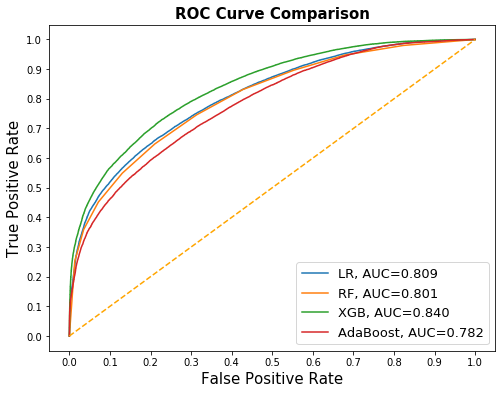

In [4]:
PLOT_MULTIPLE_ROC(result_df)

In [12]:
def BOXPLOT_RESULTS(result_df, col, classifiers):
    fig = plt.figure()
    fig.suptitle('%s comparison' % col)
    ax = fig.add_subplot(111)
    plt.boxplot(result_df[col])
    ax.set_xticklabels(classifiers)
    plt.show()

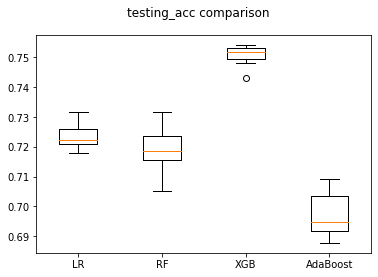

In [13]:
BOXPLOT_RESULTS(result_df, 'testing_acc', classifiers)

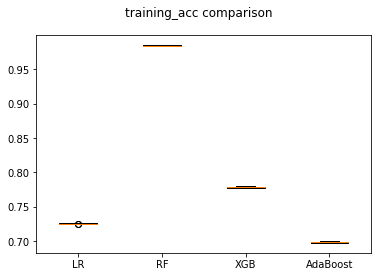

In [14]:
BOXPLOT_RESULTS(result_df,'training_acc', classifiers)

In [ ]:
BOXPLOT_RESULTS(result_df, '')


classifier:  LR


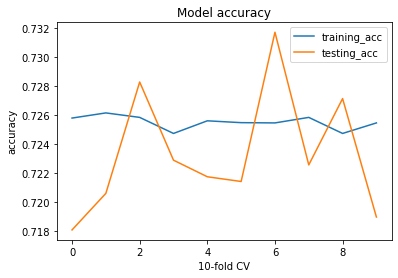


classifier:  RF


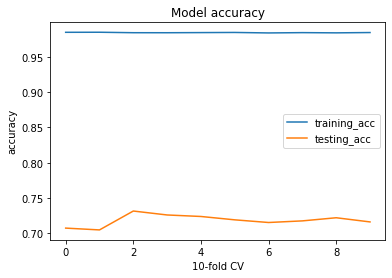


classifier:  XGB


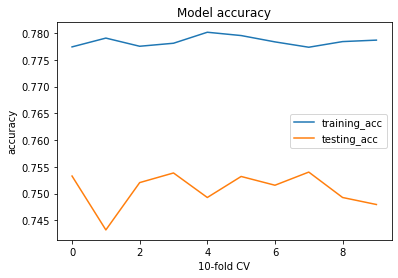


classifier:  AdaBoost


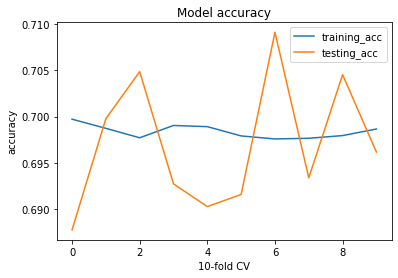

In [7]:
classifiers = ['LR', 'RF', 'XGB', 'AdaBoost']
for i in classifiers:
    print('\nclassifier: ', i)
    PLOT_ACCURACY(result_df.loc[i]['training_acc'], result_df.loc[i]['testing_acc'])